<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [24]:
df = pd.read_csv("googleplaystore.csv")
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [3]:
info = pd.DataFrame({
    'Dtype': df.dtypes,
    'non-null count': (~df.isnull()).sum()
})
info

,Dtype,non-null count
App,object,10841
Category,object,10841
Rating,float64,9367
Reviews,object,10841
Size,object,10841
Installs,object,10841
Type,object,10840
Price,object,10841
Content Rating,object,10840
Genres,object,10841


In [4]:
df.isnull().sum() * 100 / len(df)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [5]:
# For Checking Duplicates use duplicated()
print("Duplicated before: ",df.duplicated().sum())
# Use drop_duplicates to Drop()
df = df.drop_duplicates()
print("Duplicated after: ",df.duplicated().sum())

Duplicated before:  483
Duplicated after:  0


### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [6]:
# use Column.astype(str).str.replace
df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace('-', '')

In [7]:
# use to_numeric to convert to int
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [8]:
df['Installs'].dtype

dtype('float64')

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [9]:
# Same as Above
df['Price'] = df['Price'].astype(str).str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].dtype


dtype('float64')

**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [10]:
# Hint: Define a function clean_size(x).
# Hint: If 'M' in x: return float(x.replace('M', '')) * 1000000
# Hint: Handle the 'Varies with device' edge case carefully.

def clean_size(x):
    x = str(x)
    if 'M' in x:
        # Convert 19M to 19000000
        return x.replace('M', '000000')
        
    elif 'k' in x:
        # Convert 500k to 500000
        return x.replace('K', '000')
        
    elif 'Varies with device' in x:
        # Handle string edge case
        return np.nan
        
    else:
        # Attempt to convert or return NaN
        try:
            return float(x)
        except:
            return np.nan

# Use apply Method to apply above fun
df['Size'] = df['Size'].apply(clean_size)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [11]:
df['Size'].dtype

dtype('float64')

### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

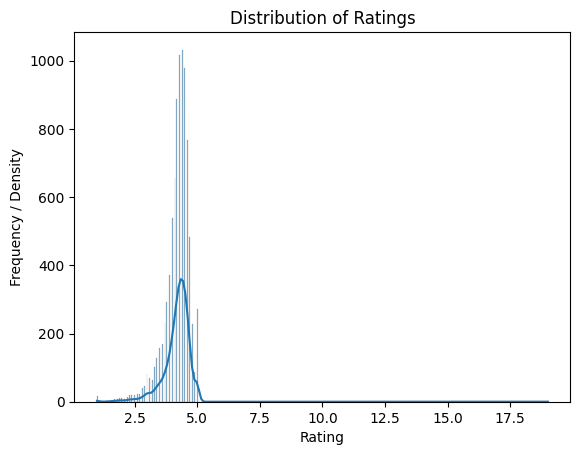

In [12]:
sb.histplot(df['Rating'], kde=True, bins=500)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency / Density')
plt.show()

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [13]:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x:  x.fillna(x.median()))
df['Rating'].isna().sum()

np.int64(0)

**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [14]:
# dropna
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1842
Installs          8567
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()

(1677, 13)

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [16]:

# Hint: numeric_only Use CORR





**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

In [17]:
# Hint: sns.heatmap



**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

In [18]:
# If needed
#plt.xscale('log')
#plt.yscale('log')
#plt.title('Reviews vs Installs (Log Scale)')
#plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

In [19]:

top_cats = df.groupby('Category')['Installs']


### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

# Without Pipline

In [20]:
from sklearn.preprocessing import StandardScaler

# Use
df.to_csv('..\Lab_3\googleplaystore.csv', index=False)


<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Dell\AppData\Local\Temp\ipykernel_580\560308153.py:4: SyntaxWarning: invalid escape sequence '\L'
  df.to_csv('..\Lab_3\googleplaystore.csv', index=False)


# With Pipline(Optional part)

In [21]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


